Question 1:
Attach the dataset and mentioned problem statement below,
● A sizable department has to be maintained, for the purposes of recruiting new talent
● More often than not, the new employees have to be trained for the job and/or given time to
acclimatize themselves to the company
● Hence, the management has contracted an HR analytics firm to understand what factors they
should focus on, in order to curb attrition.
● In other words, they want to know what changes they should make to their workplace, in order to
get most of their employees to stay.
● Also, they want to know which of these variables is most important and needs to be addressed
right away.

Problem Statement A large company named XYZ, employs, at any given point of time, around 4000 employees. However, every year, around 15% of its employees leave the company and need to be replaced with the talent pool available in the job market. The management believes that this level of attrition (employees leaving, either on their own or because they got fired) is bad for the company, because of the following reasons -

The former employees’ projects get delayed, which makes it difficult to meet timelines, resulting in a reputation loss among consumers and partners
A sizeable department has to be maintained, for the purposes of recruiting new talent
More often than not, the new employees have to be trained for the job and/or given time to acclimatise themselves to the company
Hence, the management has contracted an HR analytics firm to understand what factors they should focus on, in order to curb attrition. In other words, they want to know what changes they should make to their workplace, in order to get most of their employees to stay. Also, they want to know which of these variables is most important and needs to be addressed right away.

Since you are one of the star analysts at the firm, this project has been given to you.

Goal of the case study You are required to model the probability of attrition. The results thus obtained will be used by the management to understand what changes they should make to their workplace, in order to get most of their employees to stay.

Columns
EmployeeIDEmployee number/id
EnvironmentSatisfactionWork Environment Satisfaction Level
JobSatisfactionJob Involvement Level Job Involvement Level Job Involvement Level
WorkLifeBalanceWork life balance level

## 1 Retrieving the data from the general data

In [2]:
pip install csv

Note: you may need to restart the kernel to use updated packages.


  ERROR: Could not find a version that satisfies the requirement csv (from versions: none)
ERROR: No matching distribution found for csv


In [2]:
import numpy as np
import pandas as pd
data = pd.read_csv("general_data.csv")
data.head(10)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4
5,46,No,Travel_Rarely,Research & Development,8,3,Life Sciences,1,6,Female,...,3.0,Y,13,8,0,28.0,5,7,7,7
6,28,Yes,Travel_Rarely,Research & Development,11,2,Medical,1,7,Male,...,2.0,Y,20,8,1,5.0,2,0,0,0
7,29,No,Travel_Rarely,Research & Development,18,3,Life Sciences,1,8,Male,...,2.0,Y,22,8,3,10.0,2,0,0,0
8,31,No,Travel_Rarely,Research & Development,1,3,Life Sciences,1,9,Male,...,0.0,Y,21,8,0,10.0,2,9,7,8
9,25,No,Non-Travel,Research & Development,7,4,Medical,1,10,Female,...,1.0,Y,13,8,1,6.0,2,6,1,5


In [3]:
data.tail(10)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
4400,37,No,Travel_Rarely,Research & Development,22,5,Medical,1,4401,Female,...,2.0,Y,14,8,3,17.0,3,3,0,2
4401,45,No,Travel_Frequently,Sales,21,1,Marketing,1,4402,Male,...,4.0,Y,13,8,0,9.0,3,3,0,2
4402,37,Yes,Travel_Frequently,Sales,2,3,Marketing,1,4403,Male,...,6.0,Y,11,8,1,17.0,2,1,0,0
4403,39,No,Travel_Frequently,Research & Development,22,3,Medical,1,4404,Female,...,0.0,Y,19,8,1,20.0,2,19,11,8
4404,29,No,Travel_Rarely,Sales,4,3,Other,1,4405,Female,...,1.0,Y,18,8,0,6.0,2,6,1,5
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,3.0,Y,17,8,1,10.0,5,3,0,2
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,2.0,Y,15,8,0,10.0,2,3,0,2
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,0.0,Y,20,8,0,5.0,4,4,1,2
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,...,0.0,Y,14,8,1,10.0,2,9,7,8
4409,40,No,Travel_Rarely,Research & Development,28,3,Medical,1,4410,Male,...,0.0,Y,12,8,0,NaN,6,21,3,9


In [7]:
data.info

<bound method DataFrame.info of       Age Attrition     BusinessTravel              Department  \
0      51        No      Travel_Rarely                   Sales   
1      31       Yes  Travel_Frequently  Research & Development   
2      32        No  Travel_Frequently  Research & Development   
3      38        No         Non-Travel  Research & Development   
4      32        No      Travel_Rarely  Research & Development   
5      46        No      Travel_Rarely  Research & Development   
6      28       Yes      Travel_Rarely  Research & Development   
7      29        No      Travel_Rarely  Research & Development   
8      31        No      Travel_Rarely  Research & Development   
9      25        No         Non-Travel  Research & Development   
10     45        No      Travel_Rarely  Research & Development   
11     36        No      Travel_Rarely  Research & Development   
12     55        No      Travel_Rarely  Research & Development   
13     47       Yes         Non-Travel  Rese

In [ ]:
# checking whether the give data has any missing values in dataset

In [8]:
data.isnull().any()

Age                        False
Attrition                  False
BusinessTravel             False
Department                 False
DistanceFromHome           False
Education                  False
EducationField             False
EmployeeCount              False
EmployeeID                 False
Gender                     False
JobLevel                   False
JobRole                    False
MaritalStatus              False
MonthlyIncome              False
NumCompaniesWorked          True
Over18                     False
PercentSalaryHike          False
StandardHours              False
StockOptionLevel           False
TotalWorkingYears           True
TrainingTimesLastYear      False
YearsAtCompany             False
YearsSinceLastPromotion    False
YearsWithCurrManager       False
dtype: bool

In [9]:
data.describe()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000,4410.0,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,1.0,2205.500000,2.063946,65029.312925,2.694830,15.209524,8.0,0.793878,11.279936,2.799320,7.008163,2.187755,4.123129
std,9.133301,8.105026,1.023933,0.0,1273.201673,1.106689,47068.888559,2.498887,3.659108,0.0,0.851883,7.782222,1.288978,6.125135,3.221699,3.567327
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,1.0,1103.250000,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,1.0,2205.500000,2.000000,49190.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,1.0,3307.750000,3.000000,83800.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,1.0,4410.000000,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


In [10]:
data.corr()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.006963,-0.035706,NaN,0.008649,-0.002884,-0.044314,0.299243,-0.033137,NaN,-0.031753,0.680661,-0.027308,0.311309,0.216513,0.202089
DistanceFromHome,0.006963,1.000000,-0.008638,NaN,-0.001097,-0.037329,-0.021607,-0.013843,0.038125,NaN,0.011169,0.009374,-0.009001,0.031684,0.002290,0.021584
Education,-0.035706,-0.008638,1.000000,NaN,-0.009680,0.045746,0.006410,-0.016250,-0.040531,NaN,0.001261,-0.010717,0.010472,0.006080,0.022490,0.005358
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeID,0.008649,-0.001097,-0.009680,NaN,1.000000,-0.003303,0.007338,-0.001117,-0.004456,NaN,-0.014254,-0.001063,-0.010191,0.004086,0.000256,0.008579
JobLevel,-0.002884,-0.037329,0.045746,NaN,-0.003303,1.000000,0.047316,-0.009875,0.010973,NaN,0.000993,-0.036957,-0.032500,-0.064219,-0.060811,-0.055251
MonthlyIncome,-0.044314,-0.021607,0.006410,NaN,0.007338,0.047316,1.000000,-0.020726,0.004325,NaN,0.026930,-0.033787,0.050112,0.000995,0.065219,0.024304
NumCompaniesWorked,0.299243,-0.013843,-0.016250,NaN,-0.001117,-0.009875,-0.020726,1.000000,0.030860,NaN,0.017163,0.238807,-0.032286,-0.117959,-0.036656,-0.109667
PercentSalaryHike,-0.033137,0.038125,-0.040531,NaN,-0.004456,0.010973,0.004325,0.030860,1.000000,NaN,0.012548,-0.018736,-0.037392,-0.029707,-0.029542,-0.040864
StandardHours,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
print(data.isnull().any())
print(data.isnull().any().any())

Age                        False
Attrition                  False
BusinessTravel             False
Department                 False
DistanceFromHome           False
Education                  False
EducationField             False
EmployeeCount              False
EmployeeID                 False
Gender                     False
JobLevel                   False
JobRole                    False
MaritalStatus              False
MonthlyIncome              False
NumCompaniesWorked          True
Over18                     False
PercentSalaryHike          False
StandardHours              False
StockOptionLevel           False
TotalWorkingYears           True
TrainingTimesLastYear      False
YearsAtCompany             False
YearsSinceLastPromotion    False
YearsWithCurrManager       False
dtype: bool
True


In [14]:
data.drop(['EmployeeCount','EmployeeID','StandardHours','Over18','NumCompaniesWorked','TotalWorkingYears'],axis=1, inplace = True)

In [15]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'PercentSalaryHike',
       'StockOptionLevel', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [16]:
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,PercentSalaryHike,StockOptionLevel,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,Married,131160,11,0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,Single,41890,23,1,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,Married,193280,15,3,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,Married,83210,11,3,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,Single,23420,12,2,2,6,0,4


In [17]:
data_corr = data[['Age','Attrition','BusinessTravel','DistanceFromHome','Education', 'EducationField','Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome',
       'PercentSalaryHike', 'StockOptionLevel',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']]

In [18]:
corr=data_corr.corr()
corr

,Age,DistanceFromHome,Education,JobLevel,MonthlyIncome,PercentSalaryHike,StockOptionLevel,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.006963,-0.035706,-0.002884,-0.044314,-0.033137,-0.031753,-0.027308,0.311309,0.216513,0.202089
DistanceFromHome,0.006963,1.000000,-0.008638,-0.037329,-0.021607,0.038125,0.011169,-0.009001,0.031684,0.002290,0.021584
Education,-0.035706,-0.008638,1.000000,0.045746,0.006410,-0.040531,0.001261,0.010472,0.006080,0.022490,0.005358
JobLevel,-0.002884,-0.037329,0.045746,1.000000,0.047316,0.010973,0.000993,-0.032500,-0.064219,-0.060811,-0.055251
MonthlyIncome,-0.044314,-0.021607,0.006410,0.047316,1.000000,0.004325,0.026930,0.050112,0.000995,0.065219,0.024304
PercentSalaryHike,-0.033137,0.038125,-0.040531,0.010973,0.004325,1.000000,0.012548,-0.037392,-0.029707,-0.029542,-0.040864
StockOptionLevel,-0.031753,0.011169,0.001261,0.000993,0.026930,0.012548,1.000000,-0.069902,0.007886,0.019063,0.017757
TrainingTimesLastYear,-0.027308,-0.009001,0.010472,-0.032500,0.050112,-0.037392,-0.069902,1.000000,-0.007894,0.016121,-0.013270
YearsAtCompany,0.311309,0.031684,0.006080,-0.064219,0.000995,-0.029707,0.007886,-0.007894,1.000000,0.618409,0.769212
YearsSinceLastPromotion,0.216513,0.002290,0.022490,-0.060811,0.065219,-0.029542,0.019063,0.016121,0.618409,1.000000,0.510224


In [20]:
import matplotlib.pyplot as plt

In [21]:
import seaborn as sns

In [68]:
import os


In [69]:
sns.set()

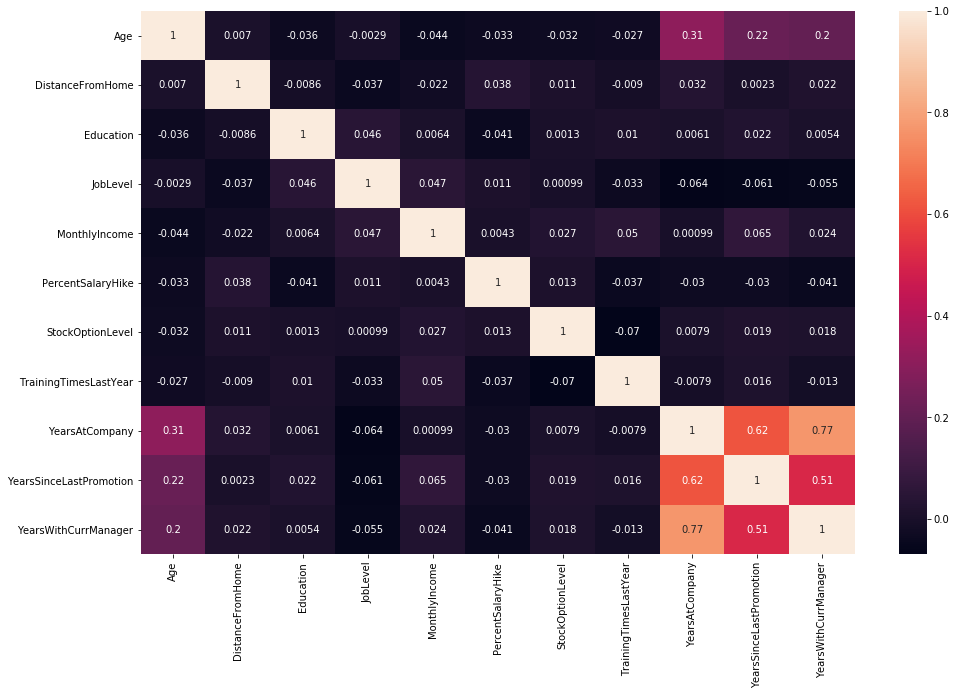

In [32]:
corr = data_corr.corr()
plt.figure(figsize=(16,10))
sns.heatmap(corr,annot=True)
plt.show()

No     0.84
Yes    0.16
Name: Attrition, dtype: float64


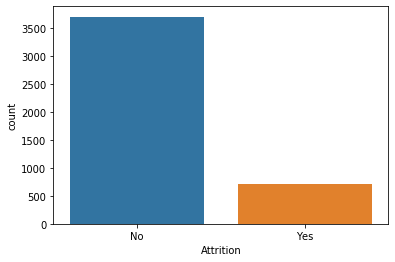

In [29]:
print(round(data['Attrition'].value_counts(normalize = True),2))
sns.countplot(x='Attrition',data=data)

In [36]:
def Age(dataframe):
    dataframe.loc[dataframe['Age'] <= 30,'Age'] = 1
    dataframe.loc[(dataframe['Age'] > 30) & (dataframe['Age'] <= 40), 'Age'] = 2
    dataframe.loc[(dataframe['Age'] > 40) & (dataframe['Age'] <= 50), 'Age'] = 3
    dataframe.loc[(dataframe['Age'] > 50) & (dataframe['Age'] <= 60), 'Age'] = 4
    return dataframe
Age(data);

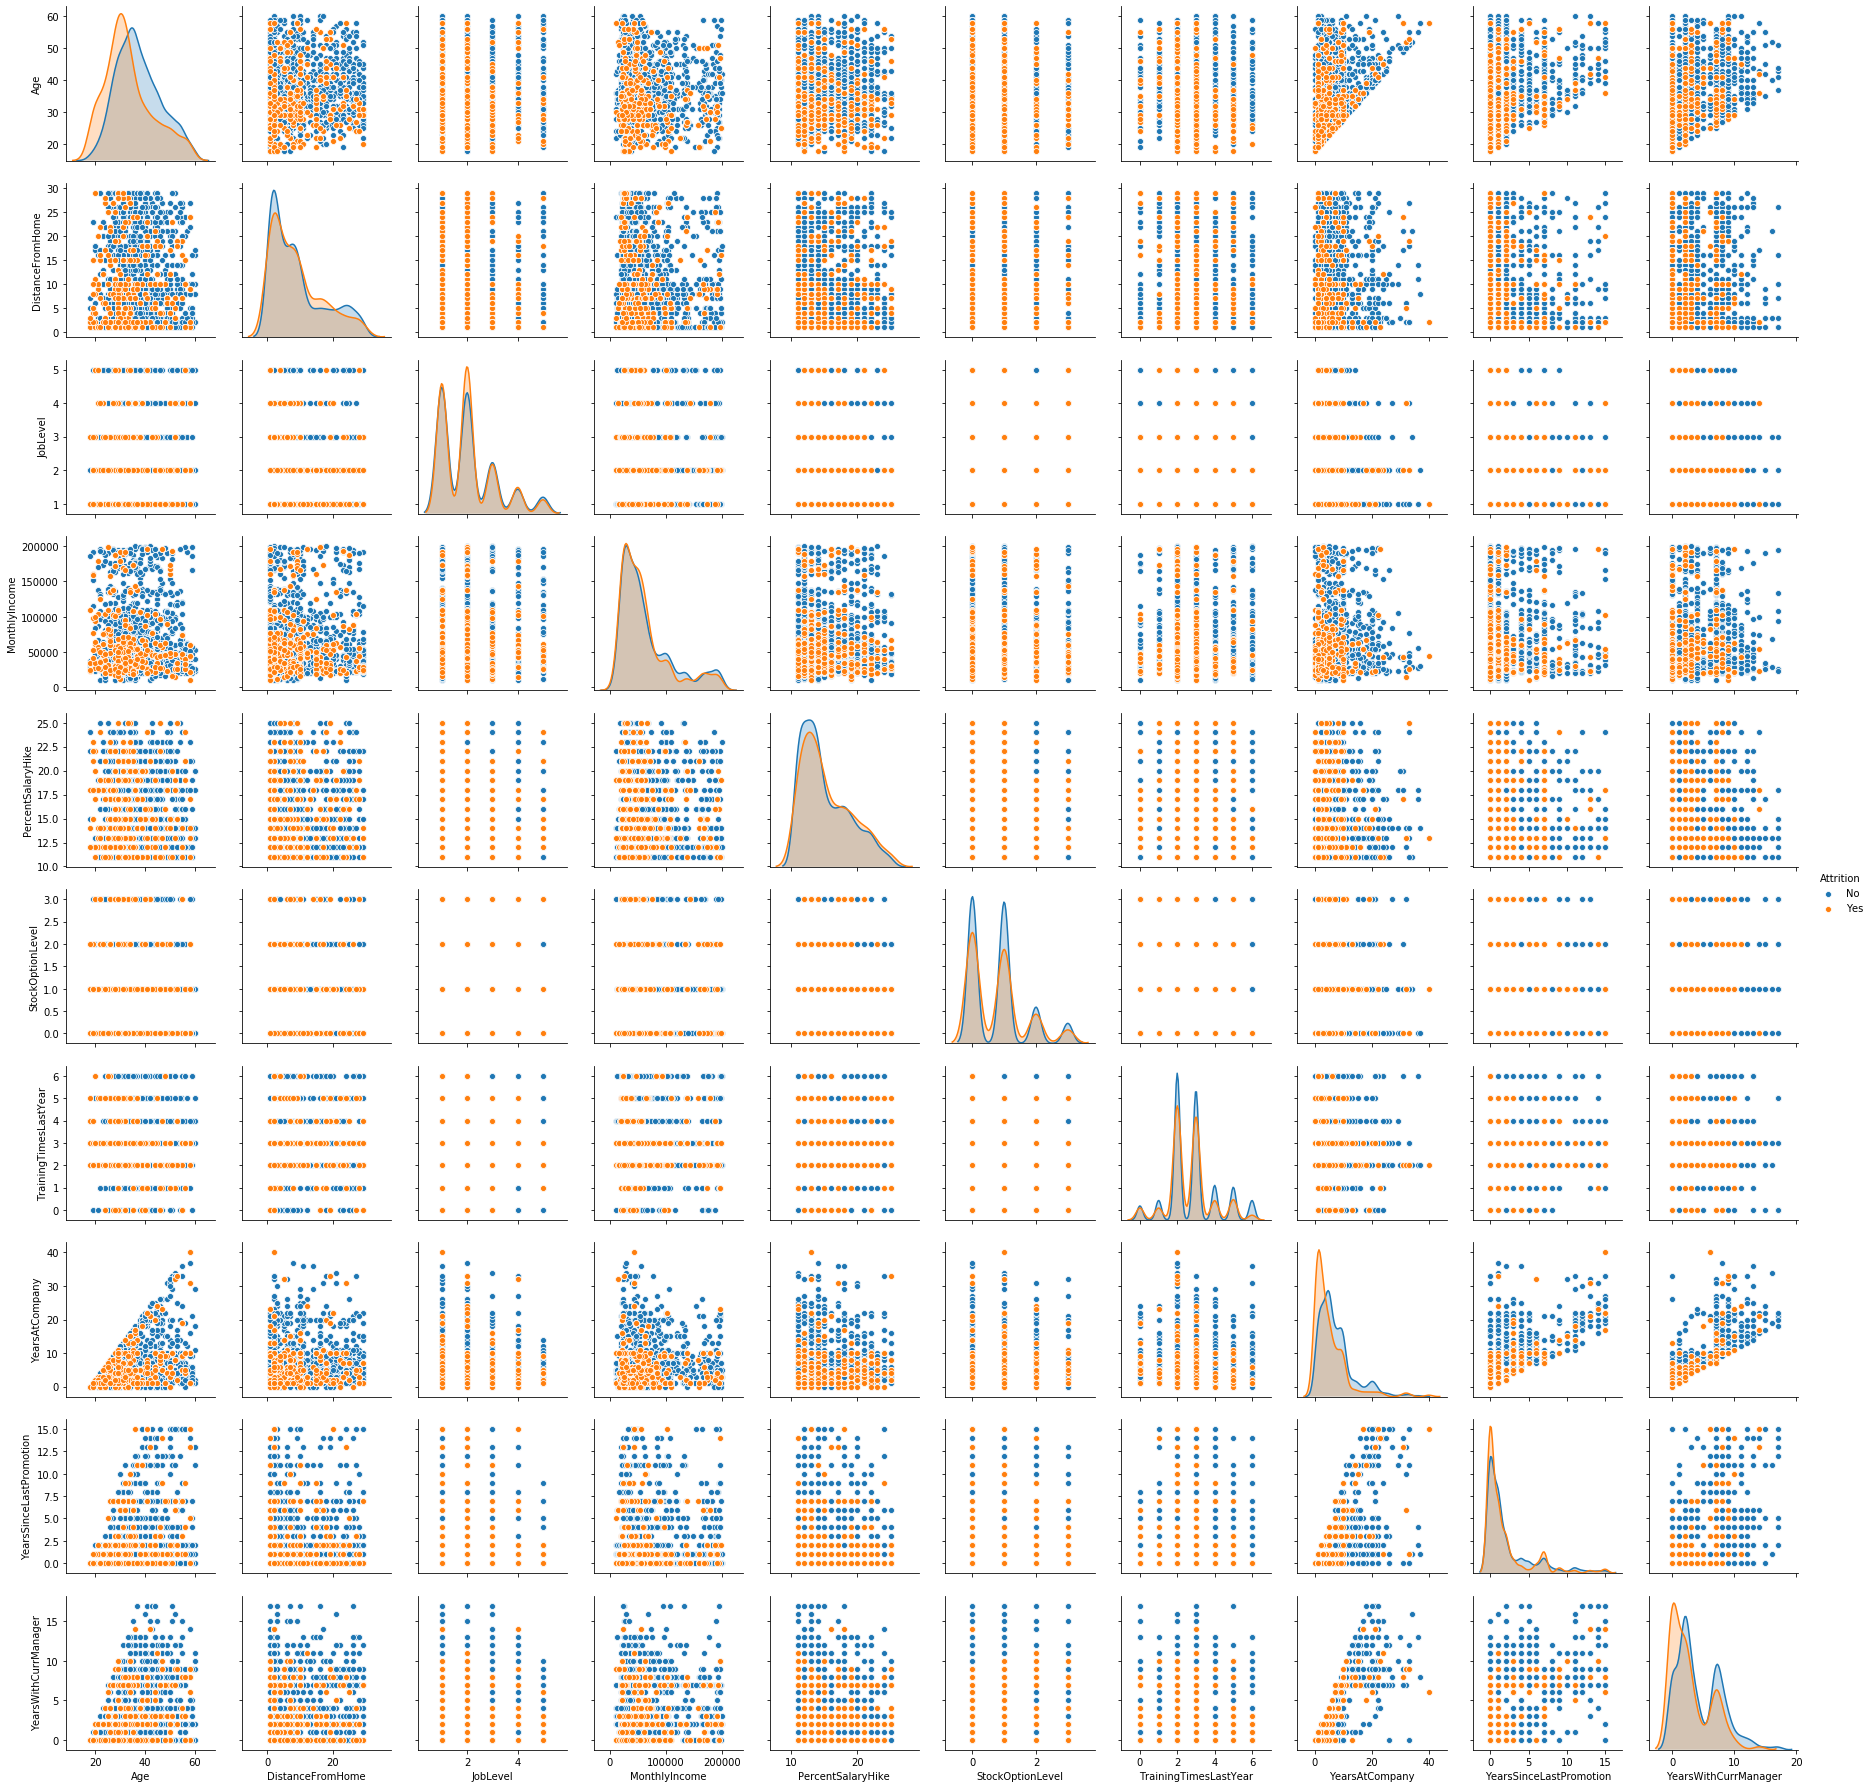

In [30]:
sns.pairplot(data[['Age', 'Attrition', 'BusinessTravel', 'DistanceFromHome', 'EducationField', 'Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome',
       'PercentSalaryHike', 'StockOptionLevel',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']],hue = 'Attrition')

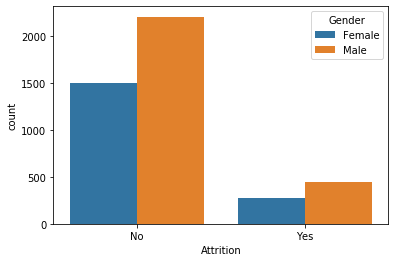

In [33]:
sns.countplot(x = "Attrition",data=data,hue="Gender")
plt.show()

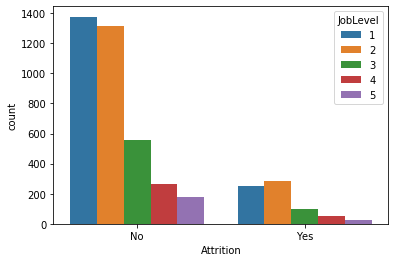

In [34]:
sns.countplot(x = "Attrition",data=data,hue="JobLevel")
plt.show()

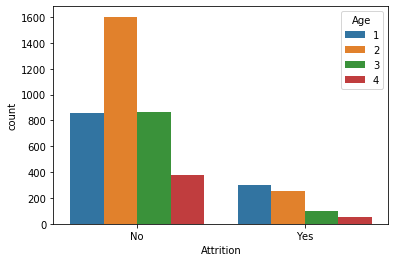

In [37]:
sns.countplot(x = "Attrition",data=data,hue="Age")
plt.show()

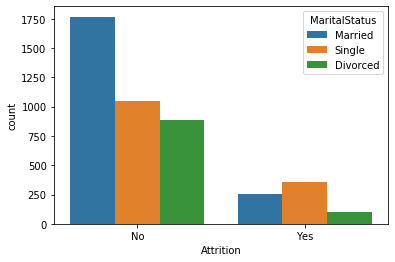

In [39]:
sns.countplot(x = "Attrition",data=data,hue="MaritalStatus")

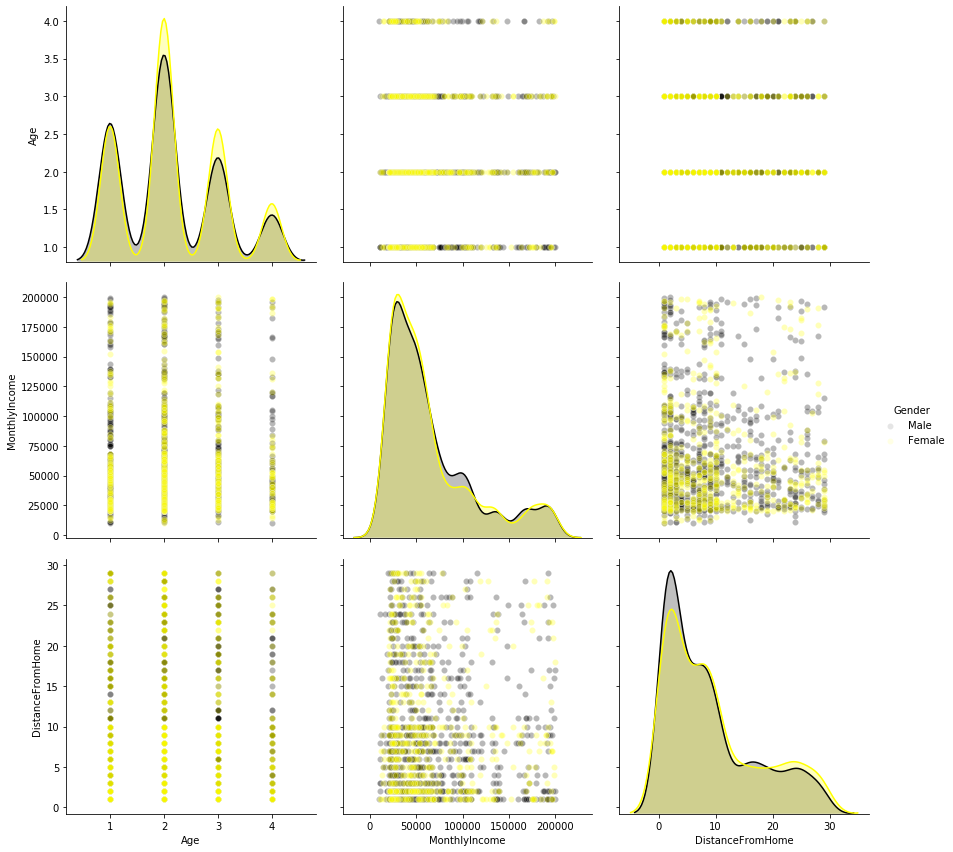

In [41]:
sns.pairplot(data[['Age','MonthlyIncome','DistanceFromHome','Gender']],hue = 'Gender',hue_order=['Male','Female'], palette={'Male':'black','Female':'yellow'},plot_kws={'alpha':0.1},height=4)

In [42]:
data.isnull().any()

Age                        False
Attrition                  False
BusinessTravel             False
Department                 False
DistanceFromHome           False
Education                  False
EducationField             False
Gender                     False
JobLevel                   False
JobRole                    False
MaritalStatus              False
MonthlyIncome              False
PercentSalaryHike          False
StockOptionLevel           False
TrainingTimesLastYear      False
YearsAtCompany             False
YearsSinceLastPromotion    False
YearsWithCurrManager       False
dtype: bool

In [44]:
print(data['BusinessTravel'].unique())
print(data['Department'].unique())
print(data['EducationField'].unique())
print(data['Gender'].unique())
print(data['JobRole'].unique())
print(data['MaritalStatus'].unique())

['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
['Sales' 'Research & Development' 'Human Resources']
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
['Female' 'Male']
['Healthcare Representative' 'Research Scientist' 'Sales Executive'
 'Human Resources' 'Research Director' 'Laboratory Technician'
 'Manufacturing Director' 'Sales Representative' 'Manager']
['Married' 'Single' 'Divorced']


In [49]:
%matplotlib inline

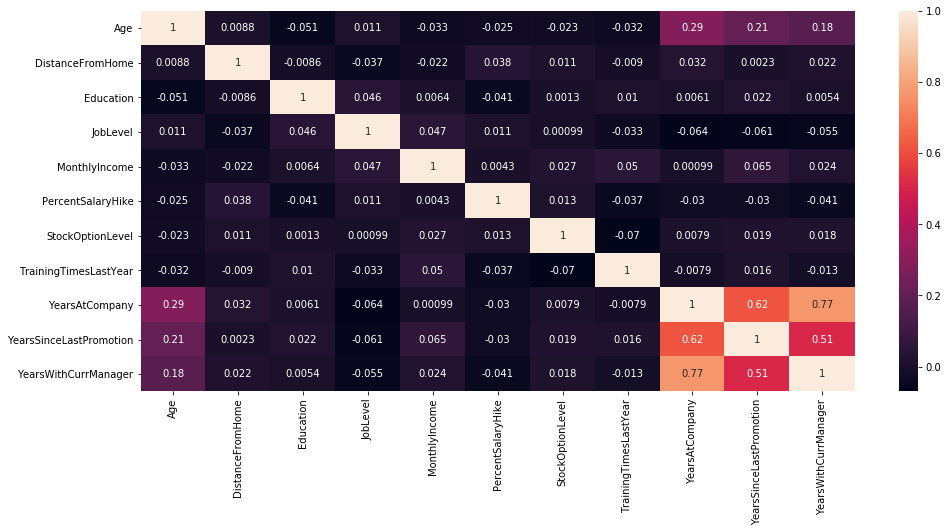

In [52]:
f,ax = plt.subplots(figsize=(16, 7))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [53]:
data.corr()

,Age,DistanceFromHome,Education,JobLevel,MonthlyIncome,PercentSalaryHike,StockOptionLevel,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.008775,-0.050993,0.010551,-0.033313,-0.024940,-0.022759,-0.032356,0.288796,0.206701,0.180118
DistanceFromHome,0.008775,1.000000,-0.008638,-0.037329,-0.021607,0.038125,0.011169,-0.009001,0.031684,0.002290,0.021584
Education,-0.050993,-0.008638,1.000000,0.045746,0.006410,-0.040531,0.001261,0.010472,0.006080,0.022490,0.005358
JobLevel,0.010551,-0.037329,0.045746,1.000000,0.047316,0.010973,0.000993,-0.032500,-0.064219,-0.060811,-0.055251
MonthlyIncome,-0.033313,-0.021607,0.006410,0.047316,1.000000,0.004325,0.026930,0.050112,0.000995,0.065219,0.024304
PercentSalaryHike,-0.024940,0.038125,-0.040531,0.010973,0.004325,1.000000,0.012548,-0.037392,-0.029707,-0.029542,-0.040864
StockOptionLevel,-0.022759,0.011169,0.001261,0.000993,0.026930,0.012548,1.000000,-0.069902,0.007886,0.019063,0.017757
TrainingTimesLastYear,-0.032356,-0.009001,0.010472,-0.032500,0.050112,-0.037392,-0.069902,1.000000,-0.007894,0.016121,-0.013270
YearsAtCompany,0.288796,0.031684,0.006080,-0.064219,0.000995,-0.029707,0.007886,-0.007894,1.000000,0.618409,0.769212
YearsSinceLastPromotion,0.206701,0.002290,0.022490,-0.060811,0.065219,-0.029542,0.019063,0.016121,0.618409,1.000000,0.510224


In [40]:
data.isnull().any()

Age                        False
Attrition                  False
BusinessTravel             False
Department                 False
DistanceFromHome           False
Education                  False
EducationField             False
EmployeeCount              False
EmployeeID                 False
Gender                     False
JobLevel                   False
JobRole                    False
MaritalStatus              False
MonthlyIncome              False
NumCompaniesWorked          True
Over18                     False
PercentSalaryHike          False
StandardHours              False
StockOptionLevel           False
TotalWorkingYears           True
TrainingTimesLastYear      False
YearsAtCompany             False
YearsSinceLastPromotion    False
YearsWithCurrManager       False
dtype: bool

In [42]:
print(data['BusinessTravel'].unique())
print(data['Department'].unique())
print(data['EducationField'].unique())
print(data['Gender'].unique())
print(data['JobRole'].unique())
print(data['MaritalStatus'].unique())

['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
['Sales' 'Research & Development' 'Human Resources']
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
['Female' 'Male']
['Healthcare Representative' 'Research Scientist' 'Sales Executive'
 'Human Resources' 'Research Director' 'Laboratory Technician'
 'Manufacturing Director' 'Sales Representative' 'Manager']
['Married' 'Single' 'Divorced']
